---
first we'll crop the images and save them in `processed-images/`

---

In [2]:
import os
from PIL import Image

card_width = 352
card_height = 550
input_directory = 'card-images'
output_directory = 'cropped-images'
if not os.path.exists(output_directory):
  os.makedirs(output_directory)

for filename in os.listdir(input_directory):
  input_path = os.path.join(input_directory, filename)
  image = Image.open(input_path)
  cropped_image = image.crop((0, 0, card_width, card_height))
  output_path = os.path.join(output_directory, filename)
  cropped_image.save(output_path)

---
now we'll apply a set of rotations to each image

---

In [18]:
input_directory = 'cropped-images'
output_directory = 'rotated-images'
if not os.path.exists(output_directory):
  os.makedirs(output_directory)

rotations = (0, 45, 90, 135, 180, 225, 270, 315)
for filename in os.listdir(input_directory):
  params = {
    'number': filename.split('-')[0],
    'color': filename.split('-')[1],
    'texture': filename.split('-')[2],
    'shape': filename.split('-')[3].split('.')[0],
  }
  input_path = os.path.join(input_directory, filename)
  image = Image.open(input_path)
  for rotation in rotations:
    params['rotation'] = rotation
    rotated_image = image.rotate(rotation, expand=True, resample=Image.BICUBIC)
    new_filename = '%s-%s-%s-%s-%s.png' % (
      params['number'], params['color'], params['texture'], params['shape'], rotation)
    output_path = os.path.join(output_directory, new_filename)
    rotated_image.save(output_path)

---
let's display a few

---

1-red-striped-oval-45.png


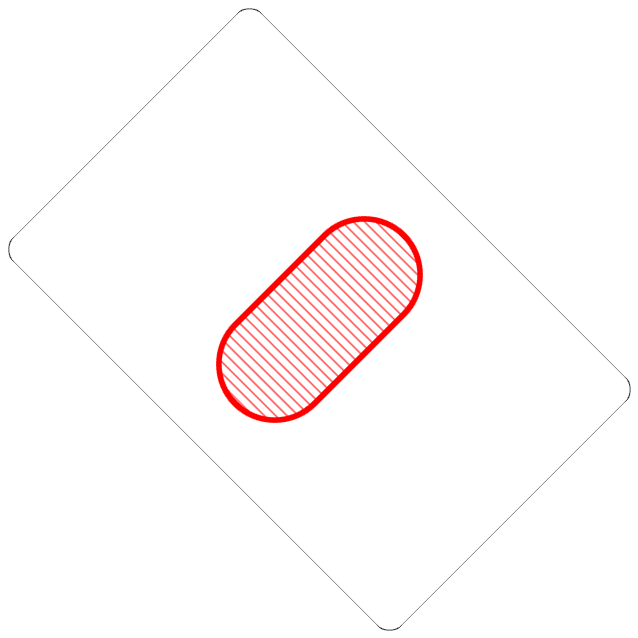

3-purple-solid-bean-135.png


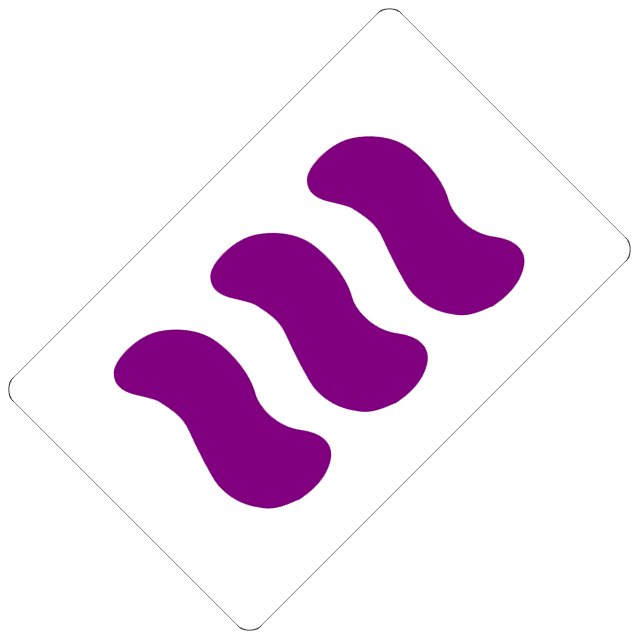

2-green-empty-diamond-270.png


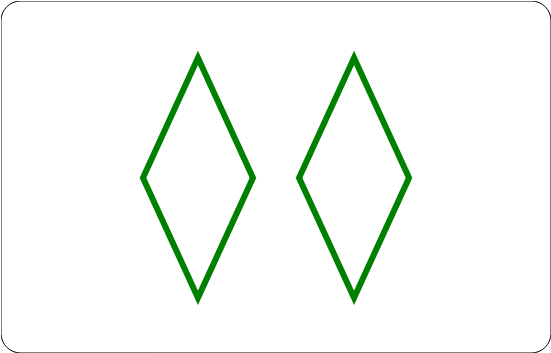

In [19]:
from IPython import display

images = (
  '1-red-striped-oval-45.png',
  '3-purple-solid-bean-135.png',
  '2-green-empty-diamond-270.png',
)

for filename in images:
  path = os.path.join(output_directory, filename)
  print filename
  display.display(display.Image(filename=path))

---
set, btw (:

---